
# MBIT School

## Executive Master en Data Science (2020-2021)

  
By

*Nuria Espadas*  
*Mireia Vecino*  
*Tomeu Mir*  

### Notebook: modelling

This notebook uses the datasets created during the previous analysis (EDAs and other modelling notebook) for evaluating different predicting models.

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

In [2]:
DATA_PATH = '../data/'
MODEL_PATH = '../models/'

In [3]:
# Load the dataset to be used for train and test
df_train_and_test = pd.read_csv(DATA_PATH + 'df_train_and_test.csv')
# List of columns to exclude for medelling
cols_to_exclude=['Unnamed: 0',
                 'I_TOTAL_SALES_SC',
                'SOURCE_COUNTRY_CODE',
                'I_BOOKINGDATE',
                'I_STARTDATE',
                 'dir',
                 'presMax'
               ]
df_train_and_test.drop( cols_to_exclude, axis=1, inplace=True)
df_train_and_test.shape

(9020, 14)

In [4]:
df_train_and_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9020 entries, 0 to 9019
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   I_DAYSBEFOREBOOK     9020 non-null   int64  
 1   STOCK_CODE           9020 non-null   object 
 2   STOCK_NAME           9020 non-null   object 
 3   ADT                  9020 non-null   int64  
 4   CHD                  9020 non-null   int64  
 5   INF                  9020 non-null   int64  
 6   LEAD_PAX_AGE         9020 non-null   float64
 7   prec                 9020 non-null   float64
 8   tmax                 9020 non-null   float64
 9   velmedia             9020 non-null   float64
 10  sol                  9020 non-null   float64
 11  i_booking_dayofweek  9020 non-null   int64  
 12  i_start_dayofweek    9020 non-null   int64  
 13  i_avg_sales          9020 non-null   float64
dtypes: float64(6), int64(6), object(2)
memory usage: 986.7+ KB


In [5]:
df_train_and_test.head()

,I_DAYSBEFOREBOOK,STOCK_CODE,STOCK_NAME,ADT,CHD,INF,LEAD_PAX_AGE,prec,tmax,velmedia,sol,i_booking_dayofweek,i_start_dayofweek,i_avg_sales
0,2,XESTCIBCSG,Teide Masca (Grand Tour),2,0,0,41.000000,0.0,31.7,7.5,11.0,1,6,36.0
1,0,XESTCIBCSG,Teide Masca (Grand Tour),2,0,0,48.794693,0.2,24.9,7.2,1.9,2,2,36.0
2,4,XESTCIBPNI,Freebird (3H Vip Exclusive),2,1,0,44.000000,0.0,27.1,6.9,10.8,0,6,41.0
3,2,PESTCI4HYS,Gomera Safari Tour,3,0,0,67.000000,0.0,25.5,9.2,4.8,3,5,95.0
4,3,XESTCIBCTW,Music Hall Tavern,2,0,0,64.000000,0.0,22.9,8.9,11.3,0,3,39.0


In [6]:
# Columns to be excluded from the dataset for modelling
target =['STOCK_CODE','STOCK_NAME']

After loading our data, we divide it in training and test

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(df_train_and_test.drop(target, axis=1),
                                                  df_train_and_test["STOCK_CODE"], 
                                                  test_size=0.3, 
                                                  random_state=1)

As we were explaining in the previous notebook, algorithms like knn, naive or svm does not work with our data. So, now on we are going to work just with Trees.  

### Decision Tree Classifier
First of all, we build the simplest one without setting any kind of parameter, just getting all of our features and train with the data that we prepared before.

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_features=None)
dt.fit(X_train, y_train)

DecisionTreeClassifier()

We predict with our data test and calculate its statistics.

In [9]:
y_pred = dt.predict(X_test)
print('\nAccuracy score:', accuracy_score(y_test, y_pred) )
print('\n',classification_report(y_test, y_pred))


Accuracy score: 0.8126385809312638

               precision    recall  f1-score   support

  LESTCI4FWU       0.93      0.88      0.90        42
  PESTCI4FLK       0.98      1.00      0.99        55
  PESTCI4FN8       0.85      0.72      0.78        86
  PESTCI4FNG       0.82      0.86      0.84       264
  PESTCI4FXQ       0.74      0.83      0.78       183
  PESTCI4HYM       0.62      0.59      0.60        93
  PESTCI4HYS       0.98      0.96      0.97        91
  PESTCI4IGS       0.76      0.73      0.74       106
  PESTCI4IJM       0.93      0.90      0.91       142
  PESTCI4KNA       0.69      0.69      0.69        48
  PESTCI4SUG       0.57      0.50      0.53        78
  PESTCI6CBQ       0.97      0.97      0.97        39
  XESTCI9VN2       0.97      0.98      0.98       116
  XESTCIB26U       0.74      0.80      0.76        49
  XESTCIB26W       0.71      0.65      0.68        78
  XESTCIB2R4       0.55      0.60      0.57        77
  XESTCIB4FU       0.84      0.90      0.87

After getting this accuracy, we are trying to improve the result of decision tree with aggregation methods based on trees.

#### Bagging

In [10]:
from sklearn.ensemble import BaggingClassifier

for j in [500,2000,8000,99999]:
    dt_stump=DecisionTreeClassifier(max_features=None,max_leaf_nodes=j)
    print(j)
    baglfy=BaggingClassifier(base_estimator=dt_stump,n_estimators=10,
            max_samples=1.0)
    baglfy=baglfy.fit(X_train, y_train)

500
2000
8000
99999


In [11]:
y_pred = baglfy.predict(X_test)
print('\nAccuracy score:', accuracy_score(y_test, y_pred) )
print('\n',classification_report(y_test, y_pred))


Accuracy score: 0.8458980044345898

               precision    recall  f1-score   support

  LESTCI4FWU       0.88      0.90      0.89        42
  PESTCI4FLK       0.96      1.00      0.98        55
  PESTCI4FN8       0.83      0.74      0.79        86
  PESTCI4FNG       0.88      0.92      0.90       264
  PESTCI4FXQ       0.78      0.92      0.84       183
  PESTCI4HYM       0.74      0.46      0.57        93
  PESTCI4HYS       0.98      0.97      0.97        91
  PESTCI4IGS       0.77      0.79      0.78       106
  PESTCI4IJM       0.94      0.92      0.93       142
  PESTCI4KNA       0.84      0.75      0.79        48
  PESTCI4SUG       0.66      0.50      0.57        78
  PESTCI6CBQ       0.97      0.97      0.97        39
  XESTCI9VN2       0.98      0.99      0.99       116
  XESTCIB26U       0.72      0.86      0.79        49
  XESTCIB26W       0.72      0.72      0.72        78
  XESTCIB2R4       0.74      0.65      0.69        77
  XESTCIB4FU       0.84      0.94      0.89

#### Boosting

In [12]:
from sklearn.ensemble import AdaBoostClassifier

for j in [500,2000,8000,99999]:
    dt_stump=DecisionTreeClassifier(max_features=None,max_leaf_nodes=j)
    print(j)
    for i in np.arange(1,50):
        bstlfy=AdaBoostClassifier(base_estimator=dt_stump,n_estimators=10)
        bstlfy=bstlfy.fit(X_train, y_train)

500
2000
8000
99999


In [13]:
y_pred = bstlfy.predict(X_test)
print('\nAccuracy score:', accuracy_score(y_test, y_pred) )
print('\n',classification_report(y_test, y_pred))


Accuracy score: 0.8107908351810791

               precision    recall  f1-score   support

  LESTCI4FWU       0.86      0.88      0.87        42
  PESTCI4FLK       1.00      1.00      1.00        55
  PESTCI4FN8       0.80      0.74      0.77        86
  PESTCI4FNG       0.83      0.86      0.85       264
  PESTCI4FXQ       0.72      0.80      0.76       183
  PESTCI4HYM       0.59      0.55      0.57        93
  PESTCI4HYS       0.98      0.97      0.97        91
  PESTCI4IGS       0.74      0.74      0.74       106
  PESTCI4IJM       0.93      0.91      0.92       142
  PESTCI4KNA       0.68      0.67      0.67        48
  PESTCI4SUG       0.57      0.49      0.52        78
  PESTCI6CBQ       0.97      0.97      0.97        39
  XESTCI9VN2       0.97      0.99      0.98       116
  XESTCIB26U       0.70      0.80      0.74        49
  XESTCIB26W       0.73      0.65      0.69        78
  XESTCIB2R4       0.58      0.58      0.58        77
  XESTCIB4FU       0.85      0.90      0.87

Comparing this two methods of aggregation, we see that with Bagging we get better accuracy so we are going to try with different variants of bagging. 

### Random Forest

We initially get a quick overview using "almost" the model with the default parameters. (instead of using the default value for max_features ("auto”, then max_features=sqrt(n_features) ) we already set it to None for using all features always.

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features=None)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=None)

In [15]:
y_pred = rf.predict(X_test)
print('\nAccuracy score:', accuracy_score(y_test, y_pred) )
print('\n',classification_report(y_test, y_pred))


Accuracy score: 0.8492239467849224

               precision    recall  f1-score   support

  LESTCI4FWU       0.90      0.90      0.90        42
  PESTCI4FLK       1.00      1.00      1.00        55
  PESTCI4FN8       0.85      0.74      0.80        86
  PESTCI4FNG       0.88      0.90      0.89       264
  PESTCI4FXQ       0.77      0.91      0.83       183
  PESTCI4HYM       0.67      0.41      0.51        93
  PESTCI4HYS       0.99      0.97      0.98        91
  PESTCI4IGS       0.78      0.80      0.79       106
  PESTCI4IJM       0.96      0.90      0.93       142
  PESTCI4KNA       0.73      0.69      0.71        48
  PESTCI4SUG       0.74      0.51      0.61        78
  PESTCI6CBQ       1.00      0.97      0.99        39
  XESTCI9VN2       0.99      0.99      0.99       116
  XESTCIB26U       0.78      0.80      0.79        49
  XESTCIB26W       0.68      0.69      0.68        78
  XESTCIB2R4       0.79      0.62      0.70        77
  XESTCIB4FU       0.86      0.96      0.91

### GridSearch for our Random Forest

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report

#Grid --- 
# Tuning hyper-parameters for accuracy
tuned_parameters={'n_estimators'    : [100, 500, 1000],
                  # 'max_depth'       : [15,20],
                  'max_features'    : [6,9,12],
                  'min_samples_leaf': [2,5]}

grid_rf=GridSearchCV(estimator=rf, 
                     param_grid=tuned_parameters, 
                     cv=5, 
                     scoring='accuracy',
                     verbose=3 # 4 - displays for each fold.
                    )

grid_rf.fit(X_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END max_features=6, min_samples_leaf=2, n_estimators=100;, score=0.794 total time=   0.7s
[CV 2/5] END max_features=6, min_samples_leaf=2, n_estimators=100;, score=0.826 total time=   0.7s
[CV 3/5] END max_features=6, min_samples_leaf=2, n_estimators=100;, score=0.831 total time=   0.8s
[CV 4/5] END max_features=6, min_samples_leaf=2, n_estimators=100;, score=0.844 total time=   0.7s
[CV 5/5] END max_features=6, min_samples_leaf=2, n_estimators=100;, score=0.823 total time=   0.7s
[CV 1/5] END max_features=6, min_samples_leaf=2, n_estimators=500;, score=0.801 total time=   3.4s
[CV 2/5] END max_features=6, min_samples_leaf=2, n_estimators=500;, score=0.824 total time=   3.4s
[CV 3/5] END max_features=6, min_samples_leaf=2, n_estimators=500;, score=0.829 total time=   3.4s
[CV 4/5] END max_features=6, min_samples_leaf=2, n_estimators=500;, score=0.846 total time=   3.4s
[CV 5/5] END max_features=6, min_samples_leaf=2,

[CV 3/5] END max_features=12, min_samples_leaf=5, n_estimators=500;, score=0.835 total time=   4.5s
[CV 4/5] END max_features=12, min_samples_leaf=5, n_estimators=500;, score=0.848 total time=   4.6s
[CV 5/5] END max_features=12, min_samples_leaf=5, n_estimators=500;, score=0.845 total time=   4.6s
[CV 1/5] END max_features=12, min_samples_leaf=5, n_estimators=1000;, score=0.806 total time=   9.0s
[CV 2/5] END max_features=12, min_samples_leaf=5, n_estimators=1000;, score=0.818 total time=   9.0s
[CV 3/5] END max_features=12, min_samples_leaf=5, n_estimators=1000;, score=0.836 total time=   9.1s
[CV 4/5] END max_features=12, min_samples_leaf=5, n_estimators=1000;, score=0.844 total time=   9.0s
[CV 5/5] END max_features=12, min_samples_leaf=5, n_estimators=1000;, score=0.843 total time=   9.1s


GridSearchCV(cv=5, estimator=RandomForestClassifier(max_features=None),
             param_grid={'max_features': [6, 9, 12], 'min_samples_leaf': [2, 5],
                         'n_estimators': [100, 500, 1000]},
             scoring='accuracy', verbose=3)

In [17]:
means=grid_rf.cv_results_['mean_test_score']
stds =grid_rf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, grid_rf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.824 (+/-0.033) for {'max_features': 6, 'min_samples_leaf': 2, 'n_estimators': 100}
0.827 (+/-0.029) for {'max_features': 6, 'min_samples_leaf': 2, 'n_estimators': 500}
0.826 (+/-0.026) for {'max_features': 6, 'min_samples_leaf': 2, 'n_estimators': 1000}
0.807 (+/-0.022) for {'max_features': 6, 'min_samples_leaf': 5, 'n_estimators': 100}
0.809 (+/-0.019) for {'max_features': 6, 'min_samples_leaf': 5, 'n_estimators': 500}
0.810 (+/-0.021) for {'max_features': 6, 'min_samples_leaf': 5, 'n_estimators': 1000}
0.844 (+/-0.023) for {'max_features': 9, 'min_samples_leaf': 2, 'n_estimators': 100}
0.841 (+/-0.027) for {'max_features': 9, 'min_samples_leaf': 2, 'n_estimators': 500}
0.841 (+/-0.029) for {'max_features': 9, 'min_samples_leaf': 2, 'n_estimators': 1000}
0.827 (+/-0.028) for {'max_features': 9, 'min_samples_leaf': 5, 'n_estimators': 100}
0.828 (+/-0.026) for {'max_features': 9, 'min_samples_leaf': 5, 'n_estimators': 500}
0.831 (+/-0.025) for {'max_features': 9, 'min_samples_leaf': 5

In [18]:
grid_rf.cv_results_['params'][0]

{'max_features': 6, 'min_samples_leaf': 2, 'n_estimators': 100}

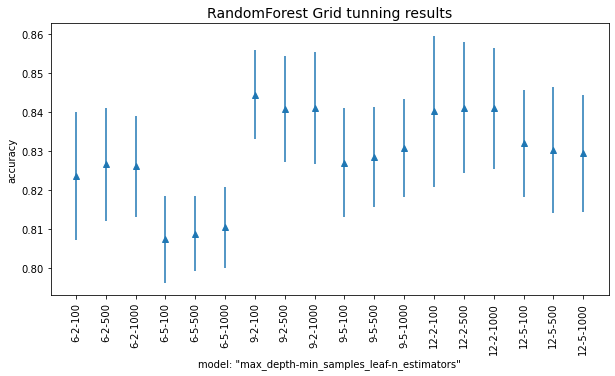

In [19]:
import matplotlib.pyplot as plt
import numpy as np

models = []
for m in grid_rf.cv_results_['params']:
    models.append( '%0.0f-%0.0f-%0.0f' % (m['max_features'],m['min_samples_leaf'],m['n_estimators']) )

x = models
y = grid_rf.cv_results_['mean_test_score']
e = grid_rf.cv_results_['std_test_score']

plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.title('RandomForest Grid tunning results', fontsize=14)
plt.xlabel('model: "max_depth-min_samples_leaf-n_estimators"', fontsize=10)
plt.ylabel('accuracy', fontsize=10)
plt.errorbar(x, y, e, linestyle='None', marker='^')
plt.show()

In [20]:
print("Detailed classification report:")
y_pred = grid_rf.predict(X_test)
print('\n',classification_report(y_test, y_pred))
print('\nAccuracy score:', accuracy_score(y_test, y_pred) )

Detailed classification report:

               precision    recall  f1-score   support

  LESTCI4FWU       0.90      0.90      0.90        42
  PESTCI4FLK       1.00      1.00      1.00        55
  PESTCI4FN8       0.82      0.71      0.76        86
  PESTCI4FNG       0.86      0.90      0.88       264
  PESTCI4FXQ       0.79      0.92      0.85       183
  PESTCI4HYM       0.71      0.42      0.53        93
  PESTCI4HYS       0.99      0.96      0.97        91
  PESTCI4IGS       0.79      0.77      0.78       106
  PESTCI4IJM       0.96      0.92      0.94       142
  PESTCI4KNA       0.81      0.71      0.76        48
  PESTCI4SUG       0.79      0.42      0.55        78
  PESTCI6CBQ       0.97      0.97      0.97        39
  XESTCI9VN2       0.98      0.99      0.99       116
  XESTCIB26U       0.67      0.84      0.75        49
  XESTCIB26W       0.77      0.76      0.76        78
  XESTCIB2R4       0.88      0.55      0.67        77
  XESTCIB4FU       0.83      0.95      0.88    

In [21]:
# We finally set the best model from the Grid for further comparisson usign the validation data
rf_turbo = grid_rf.best_estimator_

### Extra Trees Classifier
We will try Extra Trees, an ensemble machine learning algortithm that combines the predictions from many decision trees. Firstly, we don not touch any parameter.

In [22]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier()
et.fit(X_train, y_train)

ExtraTreesClassifier()

In [23]:
y_pred = et.predict(X_test)
print('\nAccuracy score:', accuracy_score(y_test, y_pred) )
print('\n',classification_report(y_test, y_pred))


Accuracy score: 0.7431633407243163

               precision    recall  f1-score   support

  LESTCI4FWU       0.81      0.71      0.76        42
  PESTCI4FLK       0.90      0.82      0.86        55
  PESTCI4FN8       0.53      0.30      0.39        86
  PESTCI4FNG       0.64      0.75      0.69       264
  PESTCI4FXQ       0.69      0.85      0.76       183
  PESTCI4HYM       0.50      0.28      0.36        93
  PESTCI4HYS       0.98      0.96      0.97        91
  PESTCI4IGS       0.75      0.65      0.70       106
  PESTCI4IJM       0.92      0.88      0.90       142
  PESTCI4KNA       0.67      0.77      0.72        48
  PESTCI4SUG       0.57      0.22      0.31        78
  PESTCI6CBQ       0.85      0.85      0.85        39
  XESTCI9VN2       0.96      0.98      0.97       116
  XESTCIB26U       0.59      0.45      0.51        49
  XESTCIB26W       0.58      0.42      0.49        78
  XESTCIB2R4       0.59      0.39      0.47        77
  XESTCIB4FU       0.79      0.95      0.87

In order that it seems a good algorithm for our data, we are going to improve the results optimizing their hyperparameters.

#### Explore extra trees number of trees, features and minimum/maximum splits effect on performance:

n_estimators --> The number of trees in the forest.

max_features --> The number of features to consider when looking for the best split.

min_samples_split --> The minimum number of samples required to split an internal node.

In [24]:
import warnings
warnings.filterwarnings('ignore')

# get a list of models to evaluate
def get_models(n_trees, min_features, max_features, min_samples_split, max_samples_split):
    models = dict()
    for i in range(min_features, max_features+1):
        for n in n_trees:
            for j in range(min_samples_split, max_samples_split+1):
                models['trees_'+str(n)+'_feat_'+str(i)+'_minsamples_'+str(j)] = ExtraTreesClassifier(n_estimators=n, max_features=i, min_samples_split=j)
    return models

# evaluate a given model using cross-validation
def evaluate_model(et, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(et, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1) # jobs=-1 -> UserWarning: A worker stopped while some jobs were given to the executor.
    return scores

from datetime import datetime
from numpy import mean
from numpy import std

# get the models to evaluate
models = get_models(n_trees=[100, 500, 1000]
                    , min_features=8
                    , max_features=len(X_train.columns)
                    , min_samples_split=2
                    , max_samples_split=5)

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('%s > %s %.3f (%.3f)' % (datetime.now().strftime("%d/%m/%Y %H:%M:%S"), name, mean(scores), std(scores)))

20/11/2021 08:49:53 > trees_100_feat_8_minsamples_2 0.857 (0.012)
20/11/2021 08:49:58 > trees_100_feat_8_minsamples_3 0.858 (0.010)
20/11/2021 08:50:04 > trees_100_feat_8_minsamples_4 0.855 (0.010)
20/11/2021 08:50:08 > trees_100_feat_8_minsamples_5 0.858 (0.009)
20/11/2021 08:50:34 > trees_500_feat_8_minsamples_2 0.860 (0.009)
20/11/2021 08:50:57 > trees_500_feat_8_minsamples_3 0.859 (0.009)
20/11/2021 08:51:17 > trees_500_feat_8_minsamples_4 0.859 (0.008)
20/11/2021 08:51:38 > trees_500_feat_8_minsamples_5 0.858 (0.008)
20/11/2021 08:52:29 > trees_1000_feat_8_minsamples_2 0.860 (0.009)
20/11/2021 08:53:15 > trees_1000_feat_8_minsamples_3 0.860 (0.010)
20/11/2021 08:54:00 > trees_1000_feat_8_minsamples_4 0.860 (0.009)
20/11/2021 08:54:46 > trees_1000_feat_8_minsamples_5 0.858 (0.009)
20/11/2021 08:54:50 > trees_100_feat_9_minsamples_2 0.861 (0.009)
20/11/2021 08:54:54 > trees_100_feat_9_minsamples_3 0.861 (0.010)
20/11/2021 08:54:58 > trees_100_feat_9_minsamples_4 0.861 (0.009)
20/11/

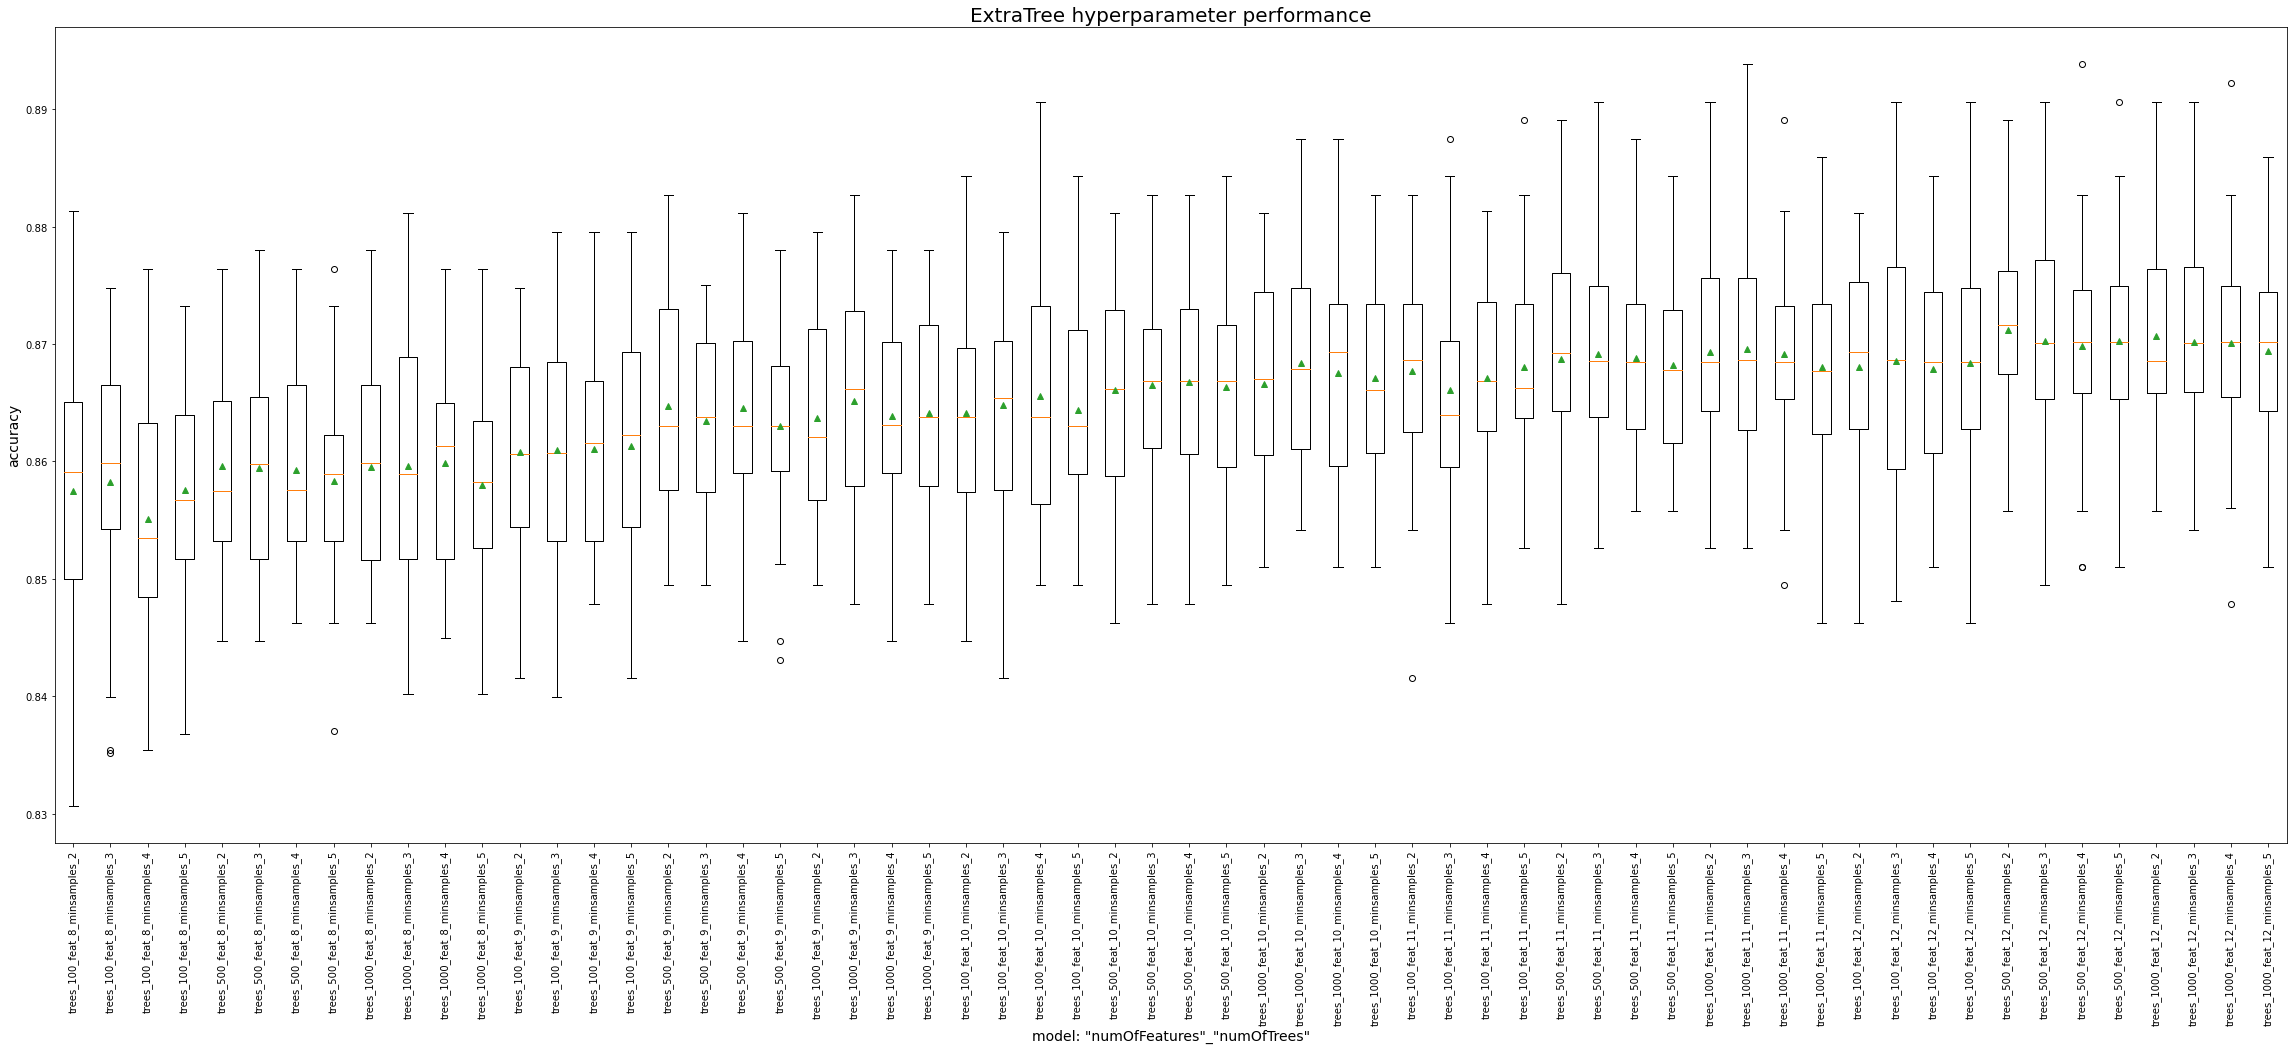

In [25]:
# plot model performance for comparison
pyplot.figure(figsize=(40, 15))
pyplot.xticks(rotation=90)
pyplot.title('ExtraTree hyperparameter performance', fontsize=20)
pyplot.xlabel('model: "numOfFeatures"_"numOfTrees"', fontsize=14)
pyplot.ylabel('accuracy', fontsize=14)
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### Our choice is n_estimators=500, max_features=12 and min_samples_split=3



In [26]:
from sklearn.ensemble import ExtraTreesClassifier

n_estimators=500
max_features=12
min_samples_split=3

et_turbo = ExtraTreesClassifier(n_estimators=n_estimators,
                                max_features=max_features,
                                min_samples_split=min_samples_split) 
et_turbo.fit(X_train, y_train)
y_pred = et_turbo.predict(X_test)
print('\nAccuracy score:', accuracy_score(y_test, y_pred) )
print('\n',classification_report(y_test, y_pred))


Accuracy score: 0.8691796008869179

               precision    recall  f1-score   support

  LESTCI4FWU       0.92      0.83      0.88        42
  PESTCI4FLK       1.00      1.00      1.00        55
  PESTCI4FN8       0.91      0.78      0.84        86
  PESTCI4FNG       0.90      0.92      0.91       264
  PESTCI4FXQ       0.82      0.92      0.87       183
  PESTCI4HYM       0.78      0.56      0.65        93
  PESTCI4HYS       0.99      0.98      0.98        91
  PESTCI4IGS       0.82      0.82      0.82       106
  PESTCI4IJM       0.98      0.92      0.95       142
  PESTCI4KNA       0.86      0.75      0.80        48
  PESTCI4SUG       0.82      0.47      0.60        78
  PESTCI6CBQ       0.97      0.97      0.97        39
  XESTCI9VN2       0.98      0.99      0.99       116
  XESTCIB26U       0.80      0.88      0.83        49
  XESTCIB26W       0.74      0.76      0.75        78
  XESTCIB2R4       0.77      0.64      0.70        77
  XESTCIB4FU       0.86      0.95      0.90

### VALIDATION

In [27]:
# Load the validation data set
df_prod = pd.read_csv(DATA_PATH + 'df_prod.csv')
df_prod.drop( cols_to_exclude, axis=1, inplace=True)

# make a list with all the models to compare with the validation data
models = [('dt',dt),
          ('rf' ,rf),
          ('rf_turbo' ,rf_turbo),
          ('et',et),
          ('et_turbo',et_turbo)]

# print the accuracy score for each model and
# store it creating a new atribute in the model: model.accuracy_score_prod
for name, model in models:
    val = model.predict(df_prod.drop(labels=target,axis=1))
    model.accuracy_score_prod = accuracy_score(df_prod['STOCK_CODE'], val) 
    print('\n',name,' -> accuracy score:', model.accuracy_score_prod )


 dt  -> accuracy score: 0.8215209518882566

 rf  -> accuracy score: 0.8569580962234868

 rf_turbo  -> accuracy score: 0.8551474392136575

 et  -> accuracy score: 0.7470253491981376

 et_turbo  -> accuracy score: 0.8812726332126228


## Decision:


After comparing the different models, we have gotten the highest accuracy with "et_turbo" so this one will be our machine learning algorithm for the project.

In [28]:
model = et_turbo
model_name = 'et_turbo'

In [29]:
val = model.predict(df_prod.drop(labels=target,axis=1))
print( len(val))
val

3866


array(['XESTCIBO3U', 'PESTCI4FXQ', 'XESTCIB4FU', ..., 'XESTCIBPNI',
       'PESTCI4FXQ', 'PESTCI4FXQ'], dtype=object)

In [30]:
print('\nAccuracy score:', accuracy_score(df_prod['STOCK_CODE'], val) )
print('\n',classification_report(df_prod['STOCK_CODE'], val))


Accuracy score: 0.8812726332126228

               precision    recall  f1-score   support

  LESTCI4FWU       0.97      0.87      0.92        78
  PESTCI4FLK       0.97      1.00      0.98        62
  PESTCI4FN8       0.91      0.85      0.88       117
  PESTCI4FNG       0.94      0.94      0.94       395
  PESTCI4FXQ       0.85      0.93      0.89       271
  PESTCI4HYM       0.83      0.63      0.71       139
  PESTCI4HYS       0.99      0.97      0.98       116
  PESTCI4IGS       0.91      0.87      0.89       159
  PESTCI4IJM       0.97      0.93      0.95       201
  PESTCI4KNA       0.89      0.83      0.86        78
  PESTCI4SUG       0.86      0.48      0.61       101
  PESTCI6CBQ       0.96      1.00      0.98        65
  XESTCI9VN2       0.98      1.00      0.99       152
  XESTCIB26U       0.82      0.90      0.86        69
  XESTCIB26W       0.79      0.76      0.77       104
  XESTCIB2R4       0.71      0.53      0.61       134
  XESTCIB4FU       0.85      0.95      0.89

#### Confusion Matrix

In this part we are going to analyse the cross errors between the different features in order to find excursions which can be switched.

In [31]:
pd.set_option('max_columns', None)
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(df_prod['STOCK_CODE'], val))
cm.loc["Total"] = cm.sum()
cm["Total"] = cm.sum(axis=1)
cm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Total
0,68,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,2,0,0,0,0,0,4,0,78
1,0,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62
2,0,0,100,7,0,0,0,0,1,0,3,0,0,0,1,1,0,0,0,0,4,0,0,0,117
3,0,0,2,370,0,0,0,0,1,4,0,0,0,3,1,2,5,1,0,0,4,0,2,0,395
4,0,0,0,0,253,13,0,2,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,271
5,0,0,1,1,44,87,0,0,0,0,0,0,0,1,2,0,0,0,0,0,2,1,0,0,139
6,0,0,0,0,0,0,112,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,116
7,0,0,0,0,0,0,0,139,0,0,0,0,0,2,0,0,12,0,0,2,0,0,1,3,159
8,0,1,1,3,0,1,1,0,187,0,1,0,0,0,0,1,0,0,0,0,3,2,0,0,201
9,0,1,0,7,0,0,0,0,0,65,1,0,0,0,1,0,0,0,0,0,2,1,0,0,78


# Export the model

We export the selected model for further use in next steps: A possible production deployment

In [32]:
import pickle

def export_model( model, name):
    # persists the model to a file using pickle creating the filename: <name.pkl>
    # it generates a report as well with the same name with relevant info about the model
    
    #save the model
    accuracy_score = round(model.accuracy_score_prod,4)
    filename = name+'_'+str(accuracy_score)+'.pkl' # example: rf_turbo_0.8810.pkl
    pickle.dump( model, open(MODEL_PATH+filename, 'wb') )
    
    # generate report
    report = 'info report for model: '+filename+'\n'
    report +='====================='+'\n'
    
    report += 'Feature names:'+'\n'
    report += str(list(X_train.columns.values))+'\n\n'
    
    report += 'Type:'+'\n'
    report += str(type(model))+'\n\n'
    
    report += 'Base estimator:'+'\n'
    report += str(rf.base_estimator_)+'\n\n'
    
    report += 'Estimators:'+'\n'
    report += str( len(model.estimators_))+' estimators\n\n'
    report += str(model.estimators_)+'\n\n'
    
    report_filename = name+'_'+str(accuracy_score)+'.txt'
    f = open(MODEL_PATH+report_filename, "w")
    f.write(report)
    f.close()


In [33]:
export_model( model, model_name )